<a href="https://colab.research.google.com/github/nastikas/Deep-Learning-with-TensorFlow/blob/master/course_1_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.2.0


This is written using Python and TensorFlow and an API in TensorFlow called keras. Keras makes it really easy to define neural networks. A neural network is basically a set of functions which can learn patterns.

In [ ]:
model= keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

n keras, you use the word dense to define a layer of connected neurons. There's only one dense here.

It will then use the data that it knows about, that's the set of Xs and Ys that we've already seen to measure how good or how bad its guess was. The loss function (Функция потерь) measures this and then gives the data to the optimizer which figures out the next guess. So the optimizer thinks about how good or how badly the guess was done using the data from the loss function. Then the logic is that each guess should be better than the one before. As the guesses get better and better, an accuracy approaches 100 percent, the term convergence is used. (Так как предположения становятся лучше и лучше, а точность приближается к 100%, то используется термин "сходимость")

In [ ]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500)

print(model.predict([10.0]))

The epochs equals 500 value means that it will go through the training loop 500 times. 

the first is that you trained it using very little data. There's only six points. Those six points are linear but there's no guarantee that for every X, the relationship will be Y equals 2X minus 1. There's a very high probability that Y equals 19 for X equals 10, but the neural network isn't positive. So it will figure out a realistic value for Y. That's the second main reason. When using neural networks, as they try to figure out the answers for everything, they deal in probability. 

# Working with a MNIST

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.

In [ ]:

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


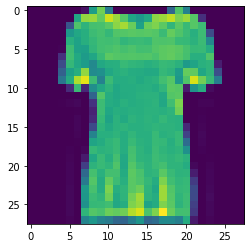

In [ ]:
plt.imshow(training_images[10])

In [ ]:
np.set_printoptions(linewidth=200)
print(training_images[10])


[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0  85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217 231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191 168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174 195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184 185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191 193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191 194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172 170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153 160 164 158 157 154 155 170 165 14

In [ ]:
print(training_labels[10])

0


normalizing our data

In [ ]:
training_images = training_images / 255.0
testing_images = training_images / 255.0

# Designing the model

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

*Sequential* - difines a sequence of layers in the neural network
*Flatten* - takes an image and turn it into a 1 dimentional set
*Dense* - adds a layer of neurons

Each layer of neurons need an *activation function* to tell them what to do. 

*Relu* - means 'if x>0 return x, else return 0'
*Softmax* - takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4997 - accuracy: 0.8257
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3727 - accuracy: 0.8668
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3360 - accuracy: 0.8783
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3128 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2934 - accuracy: 0.8926


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 54.6606 - accuracy: 0.8688


[54.660614013671875, 0.8687999844551086]

# Exercise 1

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
print(test_labels[0])

9


This list represents the probability that this item is each of the 10 classes

# Exercise 2

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.2.0
Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1846 - accuracy: 0.9444
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0748 - accuracy: 0.9766
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0486 - accuracy: 0.9836
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0348 - accuracy: 0.9885
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0635 - accuracy: 0.9825
[2.3281521e-09 1.0693165e-09 3.3311287e-09 5.6094987e-06 4.0312960e-13 2.6106527e-08 2.5665258e-14 9.9999428e-01 6.9426025e-09 1.2275676e-07]
7


If increasing the values for the dense layer with 1024 neurons Training takes longer, but is more accurate

# Exercise 3

What would happen if you remove the Flatten() layer. Why do you think that's the case?

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

# Exercise 4

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

# Exercise 5

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

# Exercise 6

Consider the impact of training for more or less epochs. Why do you think that would be the case?

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5 Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks.

# Exercise 7

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.2.0
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2018
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0794
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0515
Epoch 4/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0372
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0734
[8.1141138e-08 1.9938979e-09 1.6348513e-07 1.0998825e-06 8.3267974e-14 1.2662569e-11 6.2820674e-13 9.9999821e-01 3.8504247e-10 4.8751633e-07]
7


In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])#

2.2.0
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.9191
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3438
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3231
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2833
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3946
[0.0000000e+00 3.1616721e-21 6.5752616e-26 6.8584888e-16 1.4495370e-27 1.4299024e-28 8.2329453e-36 1.0000000e+00 9.2375689e-29 1.9196649e-20]
7


# Exercise 8

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [ ]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

# CNN

In [ ]:
model = tf.keras.models.Sequential([
                                    
  # we are asking keras to generate 64 filters for us, these filters are 3 by 3, activations is relu, 
  # which means the negative values will be thrown away https://www.youtube.com/playlist?list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF                                 
  tf.keras.layers.Conv2D(64, (3,3), activation= 'relu', input_shape = (28, 28, 1)), 
  # maxPooling - we are going to take the maximum value
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation= 'relu', input_shape = (28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation= 'relu'),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

2.2.0
4423680/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_____________________________________________________

# Steps

Step 1 is to gather the data. You'll notice that there's a bit of a change here in that the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape. 



```
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```


# Visualizing the Convolutions and Pooling

This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
import numpy as np

In [ ]:
np.set_printoptions(linewidth=200)
print(training_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

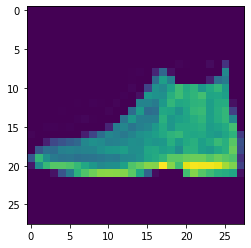

In [ ]:
plt.imshow(test_images[0])

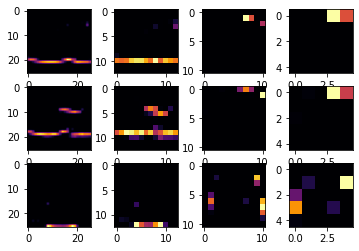

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

# EXERCISES

# 1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

accurcy is lesser

# 2. Remove the final Convolution. What impact will this have on accuracy or training time?

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  #tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  #tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3841 - accuracy: 0.8637
Epoch 2/5
1

# 3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)               

# 4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

# 5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

In [ ]:
def train_mnist_conv():
    # Please write your code only where you are indicated.
    # please do not remove model fitting inline comments.
    class myCallbacks(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')>0.998):
                print('\nReached 99.8% accuracy so cancelling training!')
                self.model.stop_training = True
    callbacks= myCallbacks()
    
    mnist = tf.keras.datasets.mnist
    (training_images, training_labels), (test_images, test_labels) = mnist.load_data(path=path)
    
    training_images = training_images.reshape(60000, 28, 28, 1)
    training_images = training_images / 255.0
    test_images = test_images.reshape(10000, 28, 28, 1)
    test_images = test_images / 255.0
    
    model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation = 'relu'),
            tf.keras.layers.Dense(10, activation = 'softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # model fitting
    history = model.fit(
        training_images, training_labels, epochs = 20, callbacks=[callbacks]
    )
    # model fitting
    return history.epoch, history.history['acc'][-1]
